In [80]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(0)
pd.set_option('display.max_columns', None)

In [93]:
raw_data = pd.read_parquet("all_data.parquet")

start_date = "2024-10-07"
end_date = "2024-10-11"

all_data = raw_data.loc[start_date:end_date]

all_data.head()

,mid_price_first,mid_price_last,mid_price_high,mid_price_low,mid_price_mean,std_mid_price,weighted_mid_price_first,weighted_mid_price_last,weighted_mid_price_mean,last_spread,mean_spread,std_spread,last_best_bid_price,mean_best_bid_price,last_best_ask_price,mean_best_ask_price,last_best_bid_size,mean_best_bid_size,std_best_bid_size,last_best_ask_size,mean_best_ask_size,std_best_ask_size,mean_second_ask_price,mean_second_bid_price,mid_price_variation,mid_price_variation_class,mean_mid_price_variation,mean_mid_price_variation_class,next_5_mean_mid_price_variation_class,weighted_mid_price_variation,weighted_mid_price_variation_class,total_bid_volume,total_ask_volume,mean_order_book_imbalance,last_order_book_imbalance,total_net_order_flow,num_added_orders,num_canceled_orders,num_traded_orders,order_book_imbalance_5s,order_flow_5s,bid_volume_variation,ask_volume_variation,bid_price_variation,ask_price_variation,trade_open,trade_close,trade_high,trade_low,ADX_5,ADX_7,ADX_10,DMP_5,DMP_10,DMN_5,DMN_10,AROONU_7,AROOND_7,OLL3,OLL5,OLL10,OLL15,OHH3,OHH5,STOCHk_7_3_3,STOCHd_7_3_3,MACD_8_21_5,RSI_7,AO_5_10,EMA_15,HMA_10,KAMA_3_2_10,MA_10,MA_20,rmCO(3),rmCO(4),rmCO(5),rmCO(6),Bollinger_Upper,Bollinger_Lower,U_minus_L,MA20dSTD,CO,C1O1,C2O2,C3O3,range,OH1,time_since_open,is_monday,is_tuesday,is_wednesday,is_thursday,is_friday
ts_recv,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-07 09:30:56-04:00,224.715,224.585,224.715,224.585,224.657938,0.038549,224.705841,224.569671,224.652563,0.05,0.034968,0.010257,224.56,224.640455,224.61,224.675422,100.0,114.389610,75.132830,417.0,223.925325,131.975164,224.685422,224.629318,-0.000579,0.0,-0.000254,0,0,-0.000606,0,-1077.0,3485.0,-0.322185,-0.613153,-317,156.0,127.0,25,-0.220301,-198.2,-10.0,162.0,0.0,0.0,224.70,224.60,224.70,224.60,56.829757,44.050740,33.425501,5.313956,12.739525,51.861940,37.785270,0.000000,100.000000,0.130,0.130,0.130,0.130,0.135,0.180,0.000000,11.030374,-0.029634,23.255558,-0.09575,224.846693,224.811285,224.769539,224.858816,224.920243,-0.080000,-0.04500,-0.060,-0.072500,225.124911,224.715575,0.409336,0.121400,-0.130,-0.090,-0.020,0.060,0.13,0.00,56.0,1,0,0,0,0
2024-10-07 09:30:58-04:00,224.585,224.510,224.585,224.445,224.514881,0.027598,224.569671,224.518169,224.513013,0.04,0.038927,0.014035,224.49,224.495417,224.53,224.534344,100.0,148.223169,168.875198,42.0,174.163543,118.837905,224.544532,224.483748,-0.000334,0.0,-0.000312,0,1,-0.000229,0,1543.0,3219.0,-0.080648,0.408451,58,279.0,236.0,72,-0.207789,-136.6,0.0,-375.0,0.0,0.0,224.56,224.52,224.56,224.47,63.021314,48.655801,36.074959,4.092404,11.269347,62.927741,44.965027,0.000000,100.000000,0.140,0.140,0.140,0.140,0.220,0.265,11.304348,6.838291,-0.042353,16.384773,-0.11950,224.805216,224.748752,224.656358,224.825188,224.897251,-0.098333,-0.07875,-0.051,-0.062500,225.165662,224.628840,0.536822,0.146803,-0.075,-0.130,-0.090,-0.020,0.14,0.00,58.0,1,0,0,0,0
2024-10-07 09:31:00-04:00,224.510,224.615,224.660,224.510,224.601400,0.032586,224.518169,224.600000,224.603488,0.05,0.035964,0.010211,224.59,224.583418,224.64,224.619382,50.0,140.978182,95.634167,200.0,103.481818,73.086386,224.630127,224.572964,0.000468,2.0,0.000407,1,1,0.000364,1,1025.0,-446.0,0.151354,-0.600000,-150,240.0,250.0,60,-0.097779,-126.4,-50.0,158.0,0.0,0.0,224.53,224.62,224.66,224.53,60.959439,48.987471,36.718641,14.898963,15.947612,48.114672,39.533714,0.000000,85.714286,0.065,0.065,0.065,0.065,0.205,0.340,37.777778,16.360709,-0.035554,30.808598,-0.12225,224.779739,224.708063,224.647722,224.784625,224.876361,-0.033333,-0.04750,-0.042,-0.025000,225.167618,224.585104,0.582514,0.158017,0.105,-0.075,-0.130,-0.090,0.15,0.00,60.0,1,0,0,0,0
2024-10-07 09:31:02-04:00,224.615,224.605,224.615,224.515,224.563345,0.025154,224.600000,224.603407,224.565389,0.03,0.035304,0.009907,224.59,224.545693,224.62,224.580998,101.0,144.600973,78.070927,125.0,132.496350,95.667192,224.593552,224.535207,-0.000045,0.0,-0.000230,0,1,0.000015,1,71

<Axes: >

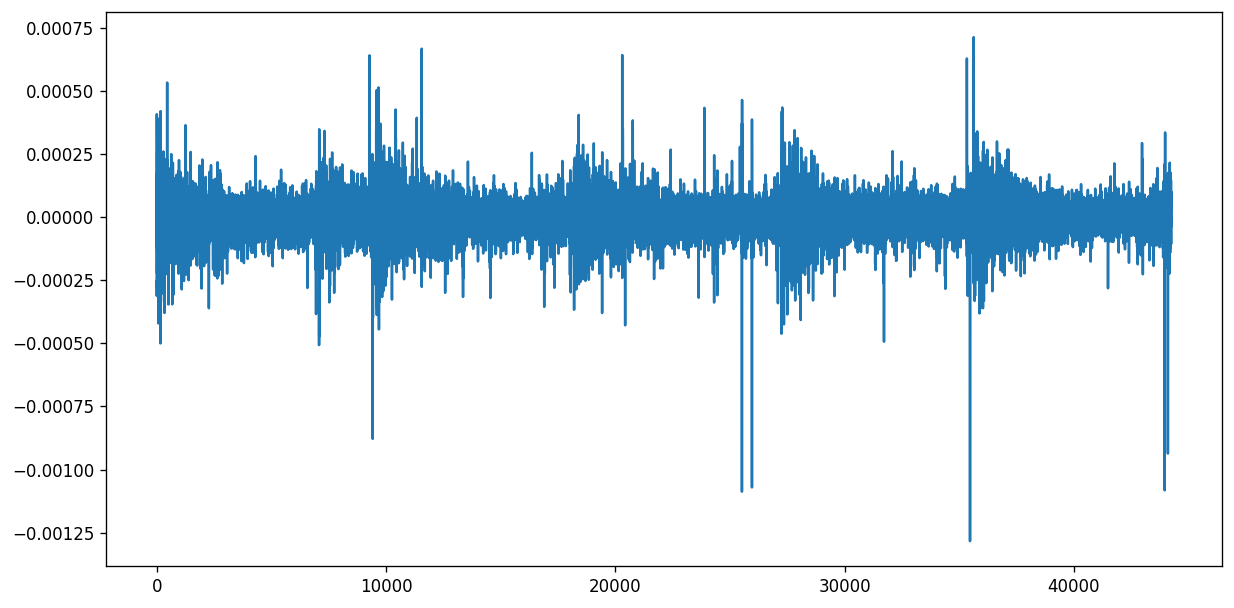

In [94]:
mean_mid_price_variations = all_data["mean_mid_price_variation"]
mean_mid_price_variations = mean_mid_price_variations.reset_index(drop=True)

mean_mid_price_variations.plot()

In [83]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(mean_mid_price_variations)

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Interpretation
if adf_result[1] < 0.05:
    print("The series is stationary (reject the null hypothesis).")
else:
    print("The series is not stationary (fail to reject the null hypothesis).")

ADF Statistic: -35.573894745449365
p-value: 0.0
Critical Values:
   1%: -3.430474647288201
   5%: -2.8615950915985127
   10%: -2.566799323425912
The series is stationary (reject the null hypothesis).


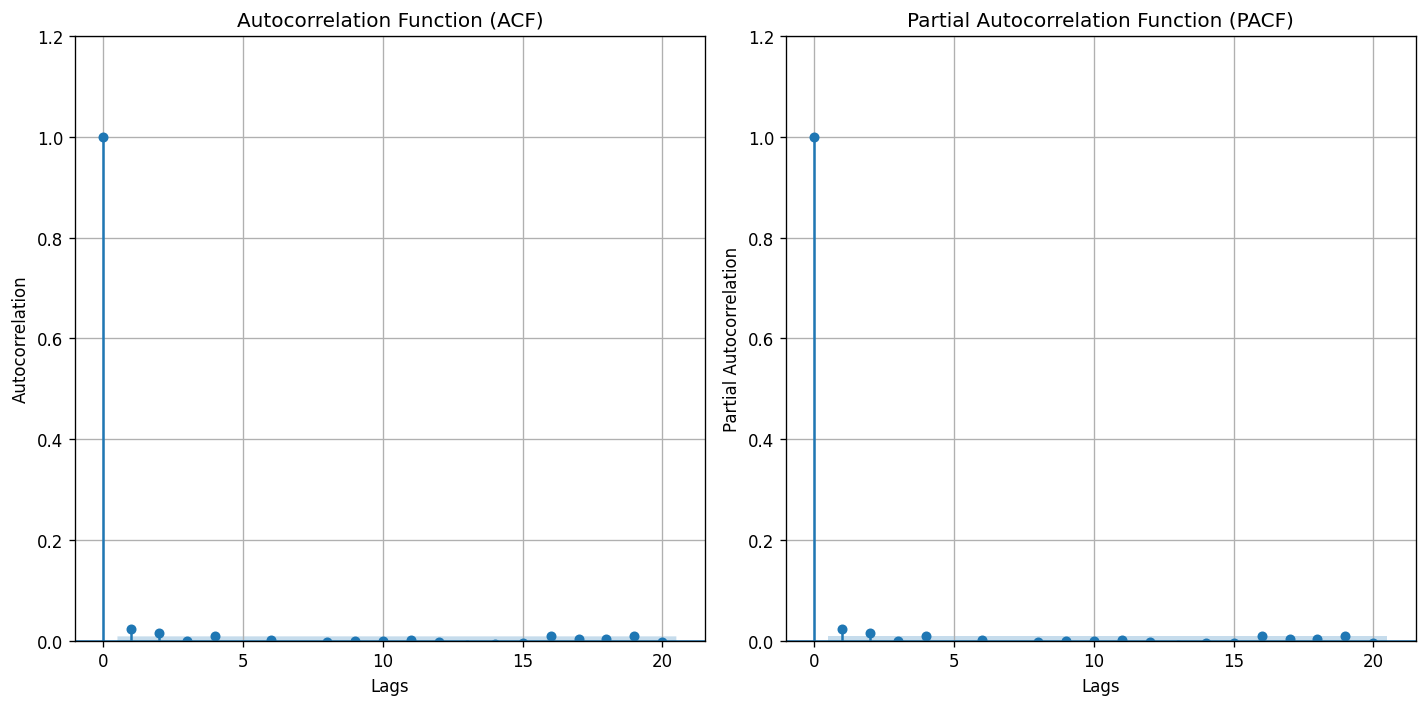

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Update plot parameters
plt.rcParams.update({'figure.figsize': (12, 6), 'figure.dpi': 120})

# Create subplots for ACF and PACF
fig, axes = plt.subplots(1, 2)

# Plot the ACF of the mean_mid_price_variations series with fewer lags
plot_acf(mean_mid_price_variations.values, ax=axes[0], lags=20)
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Autocorrelation')
axes[0].grid(True)
axes[0].set(ylim=(0, 1.2))

# Plot the PACF of the mean_mid_price_variations series with fewer lags
plot_pacf(mean_mid_price_variations.values, ax=axes[1], lags=20)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Partial Autocorrelation')
axes[1].grid(True)
axes[1].set(ylim=(0, 1.2))

plt.tight_layout()

plt.show()

In [ ]:
train_size = 50
train, test = mean_mid_price_variations[:train_size].values, mean_mid_price_variations[train_size:].values

In [ ]:
from pmdarima import auto_arima

auto_model = auto_arima(train, seasonal=False, trace=True)

# Extraire les meilleurs ordres
best_order = auto_model.order
print(f"Best ARIMA order: {best_order}")

In [96]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1, 1, 1))  # ARIMA(p=1, d=1, q=1)
model_fit = model.fit()

In [97]:
model_fit.forecast(steps=1)

array([-4.42662109e-05])

In [98]:
predictions = []
actual_values = []

display_interval = 10

for i in range(train_size, len(mean_mid_price_variations) - 1):
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast[0])  # Append the forecasted value
    
    actual_value = mean_mid_price_variations[i]
    actual_values.append(actual_value)
    
    model_fit = model_fit.append([actual_value])
    
    if (i - train_size + 1) % display_interval == 0:
        print(f"\n--- Iteration {i - train_size + 1} / {len(mean_mid_price_variations) - train_size} ---")
        print(f"Predicted value for time step {i}: {forecast[0]}")
        print(f"Actual value for time step {i}: {actual_value}")
        print(f"Updating model with actual value: {actual_value}")


--- Iteration 10 / 44197 ---
Predicted value for time step 59: -3.634107673902359e-05
Actual value for time step 59: -2.1698057427133044e-05
Updating model with actual value: -2.1698057427133044e-05

--- Iteration 20 / 44197 ---
Predicted value for time step 69: -0.00015348029209724532
Actual value for time step 69: -0.00014295364717364922
Updating model with actual value: -0.00014295364717364922

--- Iteration 30 / 44197 ---
Predicted value for time step 79: -2.8685922222121478e-06
Actual value for time step 79: -0.0003430929876747646
Updating model with actual value: -0.0003430929876747646

--- Iteration 40 / 44197 ---
Predicted value for time step 89: 9.261139850789849e-06
Actual value for time step 89: 0.00030135183733381865
Updating model with actual value: 0.00030135183733381865

--- Iteration 50 / 44197 ---
Predicted value for time step 99: 1.473885769896958e-05
Actual value for time step 99: 6.628495315896821e-05
Updating model with actual value: 6.628495315896821e-05

--- Ite

In [ ]:
from finance_utils import compute_pnl

In [99]:
predictions = np.array(predictions)
actual_values = np.array(actual_values)

mse = np.mean((np.array(predictions) - np.array(actual_values)) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.530467634281876e-09


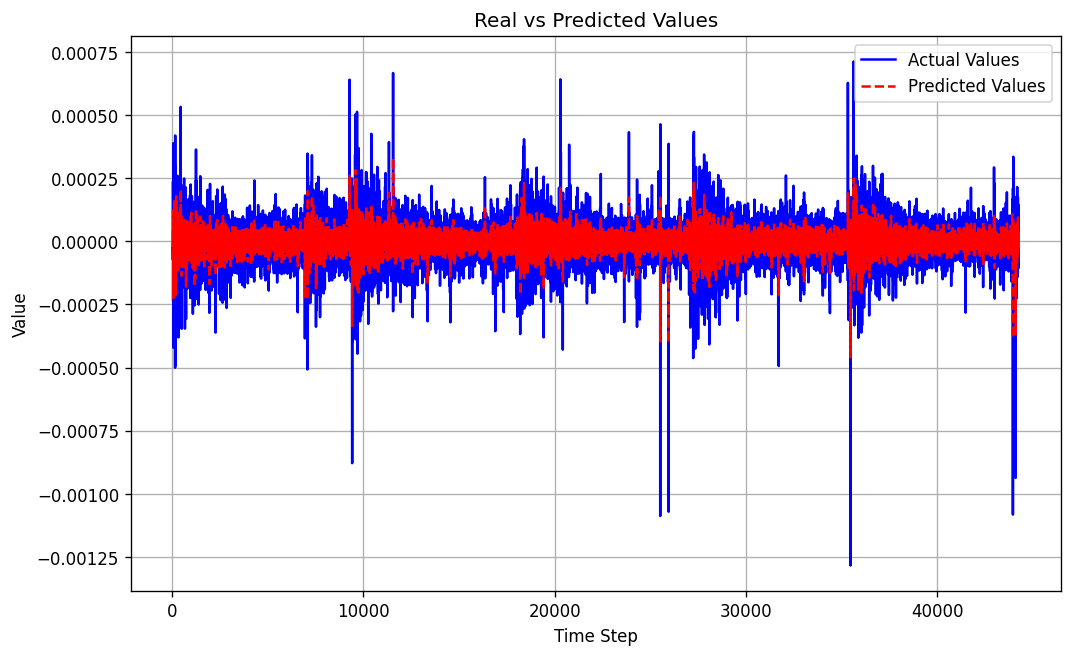

In [100]:
# Plot real vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(train_size, len(mean_mid_price_variations) - 1), actual_values, label="Actual Values", color="blue")
plt.plot(range(train_size, len(mean_mid_price_variations) - 1), predictions, label="Predicted Values", color="red", linestyle="--")
plt.title("Real vs Predicted Values")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix

predicted_classes = (predictions > 0).astype(int)
actual_classes = (actual_values > 0).astype(int)

accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(actual_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

Classification Accuracy: 50.87%
Confusion Matrix:
[[11278 11710]
 [10003 11205]]


In [ ]:
mid_price_variations = all_data["mid_price_variation"].iloc[train_size:]

In [106]:
# Save predictions and actual values to a Parquet file
results_df = pd.DataFrame({
    'predicted_classes': predicted_classes,
    'predictions': predictions,
    'actual_classes': actual_classes,
    'actual_values': actual_values,
    'mid_price_variations': mid_price_variations,
})
results_df.to_parquet('ARIMA_predictions.parquet', index=False)